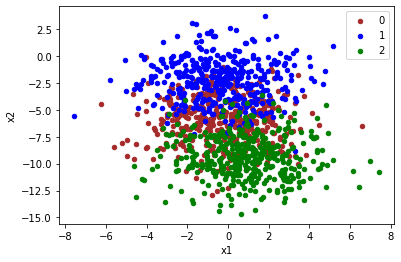

(1000, 2) (100, 2) (100, 2)


In [314]:
#Generate Syntetic Data
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import pandas as pd
import tensorflow as tf
X, y = make_blobs(n_samples=1200, centers=3, n_features=2, cluster_std=2)
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
colors = {0:'brown', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
  group.plot(ax=ax,kind='scatter', x='x1', y='x2', label=key, color=colors[key])
pyplot.show()
#Split Data into training and Testing

# one hot encode output variable
#y = tf.keras.utils.to_categorical(y)
# split into train and test

n_train = 1000
n_test = 100
trainX, testX, test_ensembleX = X[:n_train, :], X[n_train:n_train+n_test, :], X[n_train+n_test:, :]
trainy, testy, test_ensembley= y[:n_train], y[n_train:n_train+n_test],y[n_train+n_test:]
print(trainX.shape, testX.shape, test_ensembleX.shape)

Epoch 1/10
32/32 - 1s - loss: 1.0643 - accuracy: 0.4130 - val_loss: 0.9022 - val_accuracy: 0.5700
Epoch 2/10
32/32 - 0s - loss: 0.9202 - accuracy: 0.5140 - val_loss: 0.8620 - val_accuracy: 0.6300
Epoch 3/10
32/32 - 0s - loss: 0.8811 - accuracy: 0.5450 - val_loss: 0.8322 - val_accuracy: 0.6200
Epoch 4/10
32/32 - 0s - loss: 0.8487 - accuracy: 0.5730 - val_loss: 0.7946 - val_accuracy: 0.6200
Epoch 5/10
32/32 - 0s - loss: 0.8160 - accuracy: 0.5920 - val_loss: 0.7693 - val_accuracy: 0.6500
Epoch 6/10
32/32 - 0s - loss: 0.7915 - accuracy: 0.6080 - val_loss: 0.7373 - val_accuracy: 0.6500
Epoch 7/10
32/32 - 0s - loss: 0.7696 - accuracy: 0.6300 - val_loss: 0.7250 - val_accuracy: 0.6500
Epoch 8/10
32/32 - 0s - loss: 0.7527 - accuracy: 0.6410 - val_loss: 0.7061 - val_accuracy: 0.6500
Epoch 9/10
32/32 - 0s - loss: 0.7383 - accuracy: 0.6530 - val_loss: 0.7032 - val_accuracy: 0.6700
Epoch 10/10
32/32 - 0s - loss: 0.7257 - accuracy: 0.6790 - val_loss: 0.6766 - val_accuracy: 0.6400


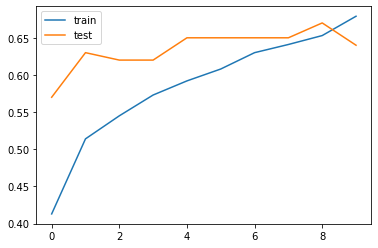

In [315]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(25, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=10, verbose=2)
pyplot.plot(trained_model.history['accuracy'], label='train')
pyplot.plot(trained_model.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [316]:
y_predict = model.predict(testX)

Epoch 1/10
32/32 - 1s - loss: 0.9929 - accuracy: 0.4300 - val_loss: 0.8959 - val_accuracy: 0.6200
Epoch 2/10
32/32 - 0s - loss: 0.8687 - accuracy: 0.5630 - val_loss: 0.8149 - val_accuracy: 0.6100
Epoch 3/10
32/32 - 0s - loss: 0.8187 - accuracy: 0.6030 - val_loss: 0.7633 - val_accuracy: 0.6200
Epoch 4/10
32/32 - 0s - loss: 0.7753 - accuracy: 0.6240 - val_loss: 0.7350 - val_accuracy: 0.6600
Epoch 5/10
32/32 - 0s - loss: 0.7409 - accuracy: 0.6620 - val_loss: 0.7017 - val_accuracy: 0.6400
Epoch 6/10
32/32 - 0s - loss: 0.7121 - accuracy: 0.6810 - val_loss: 0.6731 - val_accuracy: 0.6600
Epoch 7/10
32/32 - 0s - loss: 0.6878 - accuracy: 0.6990 - val_loss: 0.6589 - val_accuracy: 0.6800
Epoch 8/10
32/32 - 0s - loss: 0.6642 - accuracy: 0.7050 - val_loss: 0.6457 - val_accuracy: 0.6900
Epoch 9/10
32/32 - 0s - loss: 0.6511 - accuracy: 0.7090 - val_loss: 0.6317 - val_accuracy: 0.6700
Epoch 10/10
32/32 - 0s - loss: 0.6308 - accuracy: 0.7240 - val_loss: 0.6231 - val_accuracy: 0.6900


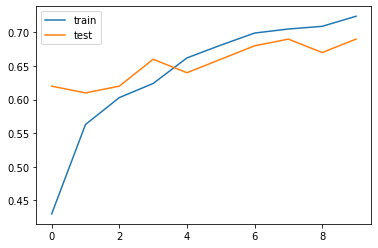

In [317]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(100, input_dim=2, activation='relu'))
model2.add(tf.keras.layers.Dense(3, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
trained_model2 = model2.fit(trainX, trainy, validation_data=(testX, testy), epochs=10, verbose=2)
pyplot.plot(trained_model2.history['accuracy'], label='train')
pyplot.plot(trained_model2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [318]:
#Now we ensemble two models using another nueral network


# update all layers in all models to not be trainable
for layer1,layer2 in zip(model.layers,model2.layers):
  layer1.trainable = False
  layer2.trainable = False
  layer1._name = 'ensemble_' + str(1) + '_' + layer1.name
  layer2._name = 'ensemble_' + str(2) + '_' + layer2.name

ensemble_visible = [model.input, model2.input]
	# concatenate merge output from each model
ensemble_outputs = [model.output, model2.output]
merge = tf.keras.layers.concatenate(ensemble_outputs)
hidden = tf.keras.layers.Dense(10, activation='relu')(merge)
output = tf.keras.layers.Dense(3, activation='softmax')(hidden)
model_ensemble = tf.keras.Model(inputs=ensemble_visible, outputs=output)
tf.keras.utils.plot_model(model_ensemble, show_shapes=True, to_file='model_graph.png')
	# compile
model_ensemble.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

	

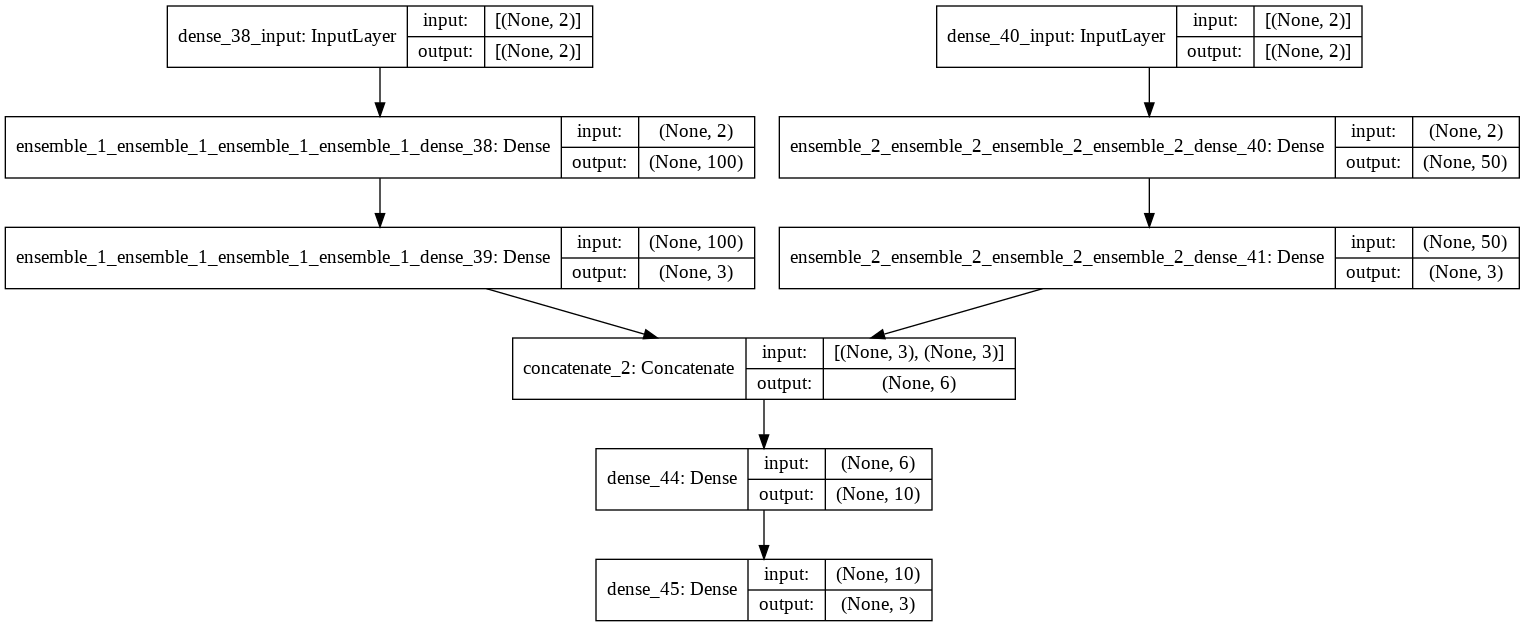

In [319]:
model_ensemble.fit([testX,testX], testy, epochs=300, verbose=0)

In [320]:
#now we generate a set of new data. this data has not been used for training two DNN models or for ensemble network

h1 = model_ensemble.evaluate([test_ensembleX,test_ensembleX],test_ensembley,verbose=0)
h2 = model.evaluate(test_ensembleX,test_ensembley,verbose=0)
h3= model2.evaluate(test_ensembleX,test_ensembley,verbose=0)

print('accuracy of the ensemble model is {}'.format(h1[1]))
print('accuracuy of the firs model is {}'.format(h2[1]))
print('accuracy of the second model is {}'.format(h3[1]))



accuracy of the ensemble model is 0.7099999785423279
accuracuy of the firs model is 0.6800000071525574
accuracy of the second model is 0.6299999952316284
